In [2]:
%pylab inline
import h5py 
import programas as pg
import pandas as pd
import grispy as gsp

Populating the interactive namespace from numpy and matplotlib


In [7]:
file = h5py.File('/mnt/projects/bias_mock/galpos_RedSample.hdf5','r')
pos = file['Subhalo/SubhaloPos'][()]
v0 = np.loadtxt('../sphvds_raul-0.8.dat')
centres = v0[:,2:5]

In [8]:
Lbox = 1440
grid = gsp.GriSPy(pos, N_cells=32)
periodic = {0: (0, Lbox), 1: (0, Lbox), 2: (0, Lbox)}
grid.set_periodicity(periodic, inplace=True)

In [9]:
bines = 20
rmin = 0
rmax = 3
bineado = np.linspace(rmin,rmax,bines)

npart = len(pos)
rhomean = npart/Lbox**3

In [10]:
nvoids = len(v0)

perfiles = np.zeros([bines-1,nvoids])
for i in range(nvoids):

    centres = v0[i,2:5]
    rvoid = v0[i,1]
    x = centres[0]
    y = centres[1]
    z = centres[2]

    perfil = pg.profile(x,y,z,rvoid,grid,bines,bineado)
    volumen = pg.profile_volume(rvoid,bines,bineado)
    
    delta = ((perfil/volumen)-rhomean)/rhomean
    
    perfiles[:,i] = delta

(0.0, 3.0)

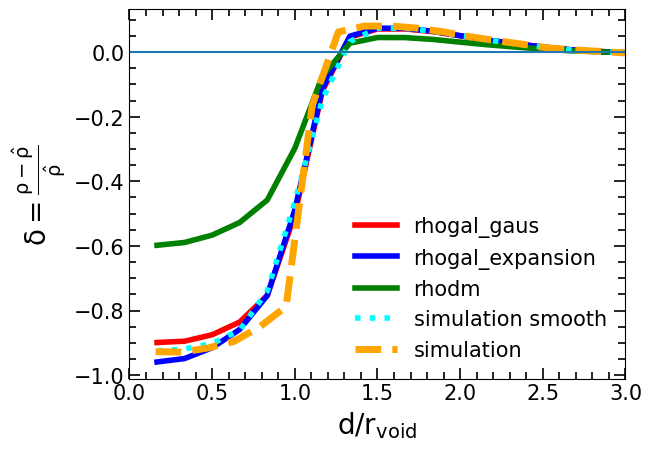

In [11]:
df = pd.read_csv('../perfiles_rhogal_eul_bias_gaus_pruebas.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_gaus.npy')
rhomean = np.mean(field)
delta = (mean - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='red',lw=4,label='rhogal_gaus')
#plt.fill_between(dist,delta_q25,delta_q75,color='red',alpha=.3)

df = pd.read_csv('../perfiles_rhogal_eul_bias_expansion_pruebas.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_expansion.npy')
rhomean = np.mean(field)
delta = (mean - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='blue',lw=4,label='rhogal_expansion')
#plt.fill_between(dist,delta_q25,delta_q75,color='blue',alpha=.3)

df = pd.read_csv('../perfiles_rhodm_eul_pruebas.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhodm_eul.npy')
rhomean = np.mean(field)
delta = (mean - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='green',lw=4,label='rhodm')


df = pd.read_csv('../perfiles_smoothed_field_mio_pruebas.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('../density_field_mio.npy')
rhomean = np.mean(field)
delta = (mean - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='cyan',lw=4,label='simulation smooth',ls='dotted')

mean_galaxies = pg.mean_profile(perfiles)
plt.plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')
#plt.fill_between(bineado[1:],q1,q2,color='orange',alpha=.3)

plt.legend(frameon=False,fontsize=15,loc='lower right')
plt.tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
plt.tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
plt.tick_params(labelsize=15)
plt.minorticks_on()

plt.xlabel('$ \\rm d/r_{void} $', size=20)
plt.ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=20)

plt.axhline(y = 0)

plt.xlim(0,3)

In [29]:
df = pd.read_csv('../perfiles_rhogal_eul_bias_gaus_pruebas.csv')
dist_gaus = df['distance']
mean_gaus = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_gaus.npy')
rhomean = np.mean(field)
delta_gaus = (mean_gaus - rhomean)/rhomean

df = pd.read_csv('../perfiles_rhogal_eul_bias_expansion_pruebas.csv')
dist_exp = df['distance']
mean_exp = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_expansion.npy')
rhomean = np.mean(field)
delta_exp = (mean_exp - rhomean)/rhomean

df = pd.read_csv('../perfiles_rhodm_eul_pruebas.csv')
dist_dm = df['distance']
mean_dm = df['media']

field = np.load('/mnt/projects/bias_mock/rhodm_eul.npy')
rhomean = np.mean(field)
delta_dm = (mean_dm - rhomean)/rhomean

df = pd.read_csv('../perfiles_smoothed_field_mio_pruebas.csv')
dist_mio = df['distance']
mean_mio = df['media']

field = np.load('../density_field_mio.npy')
rhomean = np.mean(field)
delta_mio = (mean_mio - rhomean)/rhomean

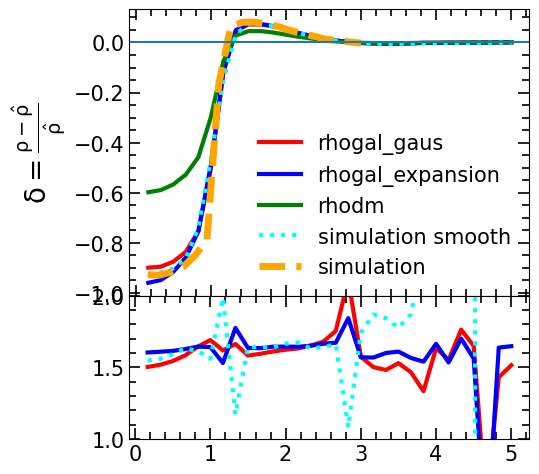

In [31]:
fig, ax = plt.subplots(ncols=1,nrows=2,figsize=(5,5),sharey='row'
                       ,gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=(0.00),wspace=(.28),bottom=0.12, top=0.98, left=0.17, right=0.97)


ax[0].plot(dist_gaus,delta_gaus,color='red',lw=3,label='rhogal_gaus')
ax[0].plot(dist_exp,delta_exp,color='blue',lw=3,label='rhogal_expansion')
ax[0].plot(dist_dm,delta_dm,color='green',lw=3,label='rhodm')
ax[0].plot(dist_mio,delta_mio,color='cyan',lw=3,label='simulation smooth',ls='dotted')

mean_galaxies = pg.mean_profile(perfiles)
ax[0].plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')

ax[0].set_xlabel('$ \\rm d/r_{void} $', size=20)
ax[0].set_ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=20)

ax[0].axhline(y = 0)

ax[0].legend(frameon=False,fontsize=15,loc='lower right')
ax[0].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[0].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[0].tick_params(labelsize=15)
ax[0].minorticks_on()

ax[1].plot(dist_gaus,delta_gaus/delta_dm,color='red',lw=3,label='rhogal_gaus')
ax[1].plot(dist_exp,delta_exp/delta_dm,color='blue',lw=3,label='rhogal_expansion')
ax[1].plot(dist_mio,delta_mio/delta_dm,color='cyan',lw=3,label='simulation smooth',ls='dotted')
#ax[1].plot(bineado[1:],mean_galaxies/delta_dm, color='orange',lw=5, ls='--', label='simulation')

ax[1].set_ylim(1,2)
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
ax[1].tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
ax[1].tick_params(labelsize=15)
ax[1].minorticks_on()



ax[1].yaxis.set_tick_params(labelsize=15)
##ax[1].hlines(y=1,xmin=0,xmax=1.18,color='grey')
##ax10].set_ylim(0.95,1.05)
ax[1].yaxis.set_tick_params(labelsize=15)
ax[1].xaxis.set_tick_params(labelsize=15)

#plt.savefig(fname='/u/arodriguez/lacegal/TNG300/figuras/met-sfr0.pdf',format='pdf')